In [1]:
%config IPCompleter.greedy=True

In [2]:
#Imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
custdata = pd.read_csv("Leads.csv")

In [4]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
custdata.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
round((custdata.isnull().sum(axis=0)/custdata.shape[0])*100,2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [7]:
# Handling 'Select' - considering them as null as default dropdown was selected
custmdata1=custdata.replace("Select",np.NaN,regex=True)

In [8]:
round((custmdata1.isnull().sum(axis=0)/custmdata1.shape[0])*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

# Handling Null Values

In [9]:
#Dropping columns with very high NULL %
customdata=custmdata1.drop(['How did you hear about X Education','Lead Profile','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'],axis=1)

#### Country, City

In [10]:
customdata[['Country','City']]

,Country,City
0,NaN,NaN
1,India,NaN
2,India,Mumbai
3,India,Mumbai
4,India,Mumbai
5,NaN,NaN
6,India,Mumbai
7,NaN,NaN
8,India,Thane & Outskirts
9,India,Mumbai


In [11]:
#Column wise null value handling
customdata['City'].nunique()

6

#### There are only 6 unique values and also for different countries other than India, the city values are incorrectly updated. hence dropping the column

In [12]:
customdata.drop('City',axis=1,inplace=True)

### Specialization

In [13]:
# Specialization is a specific entry and hence cannot be extrapolated
customdata['Specialization'].fillna("Unknown",inplace=True)

In [14]:
customdata.pivot_table(values='Prospect ID',index='Specialization',aggfunc='count').sort_values(by='Prospect ID',ascending=False)

,Prospect ID
Specialization,
Unknown,3380
Finance Management,976
Human Resource Management,848
Marketing Management,838
Operations Management,503
Business Administration,403
IT Projects Management,366
Supply Chain Management,349
"Banking, Investment And Insurance",338


### Tags

In [15]:
customdata.pivot_table(values='Prospect ID',index='Tags',aggfunc='count').sort_values(by='Prospect ID',ascending=False)

,Prospect ID
Tags,
Will revert after reading the email,2072
Ringing,1203
Interested in other courses,513
Already a student,465
Closed by Horizzon,358
switched off,240
Busy,186
Lost to EINS,175
Not doing further education,145


In [16]:
# Tags is a specific entry and hence cannot be extrapolated
customdata['Tags'].fillna("Unknown",inplace=True)

### What is your current occupation

In [17]:
customdata.pivot_table(values='Prospect ID',index='What is your current occupation',aggfunc='count').sort_values(by='Prospect ID',ascending=False)

,Prospect ID
What is your current occupation,
Unemployed,5600
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


In [18]:
# Tags is a specific entry and hence cannot be extrapolated
customdata['What is your current occupation'].fillna("Unknown",inplace=True)

### Course selection reason

In [19]:
customdata.pivot_table(values='Prospect ID',index='What matters most to you in choosing a course',aggfunc='count').sort_values(by='Prospect ID',ascending=False)

,Prospect ID
What matters most to you in choosing a course,
Better Career Prospects,6528
Flexibility & Convenience,2
Other,1


#### Course selection reason is predominantly Better Career Prospects. Hence dropping this column as this doesn't give significant variance in data

In [20]:
customdata.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [21]:
customdata['Lead Quality'].fillna("Unknown",inplace=True)

### Country

In [22]:
customdata.pivot_table(values='Prospect ID',index='Country',aggfunc='count').sort_values(by='Prospect ID',ascending=False)

,Prospect ID
Country,
India,6492
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10
Bahrain,7


In [23]:
# Country is a specific entry and hence cannot be extrapolated
customdata['Country'].fillna("Unknown",inplace=True)

### TotalVisits                                       

In [24]:
customdata.pivot_table(values='Prospect ID',index='TotalVisits',aggfunc='count').sort_values(by='Prospect ID',ascending=False)

,Prospect ID
TotalVisits,
0.0,2189
2.0,1680
3.0,1306
4.0,1120
5.0,783
6.0,466
1.0,395
7.0,309
8.0,224


In [25]:
# Total Visits are extrapolated to 0 (highest occurance for all nulls)
customdata['TotalVisits'].fillna(0.0,inplace=True)

### Page Views Per Visit

In [26]:
customdata.pivot_table(values='Prospect ID',index='Page Views Per Visit',aggfunc='count').sort_values(by='Prospect ID',ascending=False)

,Prospect ID
Page Views Per Visit,
0.00,2189
2.00,1795
3.00,1196
4.00,896
1.00,651
5.00,517
1.50,306
6.00,244
2.50,241


In [27]:
# Page Views Per Visit are extrapolated to 0 (highest occurance for all nulls)
customdata['Page Views Per Visit'].fillna(0,inplace=True)

## Last Activity

In [28]:
customdata.pivot_table(values='Prospect ID',index='Last Activity',aggfunc='count').sort_values(by='Prospect ID',ascending=False)

,Prospect ID
Last Activity,
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Email Link Clicked,267
Form Submitted on Website,116
Unreachable,93


In [29]:
customdata['Last Activity'].fillna("Unknown",inplace=True)

## Lead Source

In [30]:
customdata.pivot_table(values='Prospect ID',index='Lead Source',aggfunc='count').sort_values(by='Prospect ID',ascending=False)

,Prospect ID
Lead Source,
Google,2868
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6


In [31]:
customdata['Lead Source'].fillna("Unknown",inplace=True)

In [32]:
customdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9240 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9240 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9240 non-null float64
Last Activity                               9240 non-null object
Country                                     9240 non-null object
Specialization                              9240 non-null object
What is your current occupation             9240 

# Data diversity checks

In [33]:
customdata.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   22
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 18
Country                                       39
Specialization                                19
What is your current occupation                7
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendati

#### Drop Prospect ID as Lead Num is enough for unique ID
#### Drop Magazine, Receive Updates, Supply Chain, DM content,cheque as they have only one value and hence 0 variance

In [34]:
customdata.drop(['Prospect ID','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [35]:
customdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Do Not Call                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Country                                   9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Search                                    9240 non-null object
Newspaper Ar

In [36]:
customdata.nunique()

Lead Number                               9240
Lead Origin                                  5
Lead Source                                 22
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               18
Country                                     39
Specialization                              19
What is your current occupation              7
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Tags                                        27
Lead Quality                                 6
A free copy o

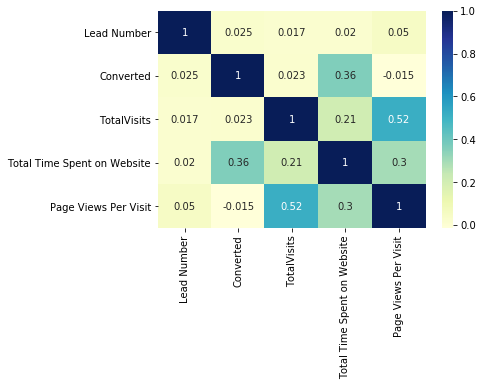

In [37]:
#plt.figure(figsize = (40, 40))
sns.heatmap(customdata.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [38]:
customdata.groupby(['Lead Source','Lead Origin']).size()

Lead Source        Lead Origin            
Click2call         Lead Add Form                 4
Direct Traffic     API                         110
                   Landing Page Submission    2433
Facebook           Landing Page Submission       1
                   Lead Import                  54
Google             API                        1158
                   Landing Page Submission    1709
                   Lead Add Form                 1
Live Chat          Lead Add Form                 2
NC_EDM             Landing Page Submission       1
Olark Chat         API                        1753
                   Lead Add Form                 2
Organic Search     API                         456
                   Landing Page Submission     698
Pay per Click Ads  Landing Page Submission       1
Press_Release      Landing Page Submission       2
Reference          Lead Add Form               534
Referral Sites     API                          98
                   Landing Page Submiss

#### Lead Origin is dependent on Lead Source. Dropping the same.
Also advertisement information is not significant for conversion. Create new dataset without these

In [39]:
customdata.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [40]:
XedLeadchk = customdata.drop(['Lead Origin','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'],axis=1)

In [41]:
print(customdata.groupby(['Do Not Email']).size())
print(customdata.groupby(['Do Not Call']).size())
print(customdata.groupby(['A free copy of Mastering The Interview']).size())

Do Not Email
No     8506
Yes     734
dtype: int64
Do Not Call
No     9238
Yes       2
dtype: int64
A free copy of Mastering The Interview
No     6352
Yes    2888
dtype: int64


#### "Do not call " lacks diversity

In [42]:
XedLeadchk.drop(['Do Not Call'],axis=1,inplace=True)

In [43]:
XedLeadchk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
Lead Number                               9240 non-null int64
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Country                                   9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Through Recommendations                   9240 non-null object
Tags                                      9240 non-null object
Lead Quality                              9240 non-null object
A free copy 

In [44]:
customdata.groupby(['Last Activity','Last Notable Activity']).size()

Last Activity                 Last Notable Activity       
Approached upfront            Approached upfront                 1
                              Modified                           8
Converted to Lead             Modified                         428
Email Bounced                 Email Bounced                     60
                              Modified                         266
Email Link Clicked            Email Link Clicked               173
                              Modified                          94
Email Marked Spam             Email Marked Spam                  2
Email Opened                  Email Opened                    2827
                              Modified                         610
Email Received                Email Received                     1
                              Modified                           1
Form Submitted on Website     Form Submitted on Website          1
                              Modified                         115
Had

#### Last notable activity is an extension of Last Activity. Hence this is being dropped

In [45]:
XedLeadchk.drop(['Last Notable Activity'],axis=1,inplace=True)

# Dummy Variable creation

In [46]:
XedLeadchk.nunique()

Lead Number                               9240
Lead Source                                 22
Do Not Email                                 2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               18
Country                                     39
Specialization                              19
What is your current occupation              7
Through Recommendations                      2
Tags                                        27
Lead Quality                                 6
A free copy of Mastering The Interview       2
dtype: int64

In [47]:
XedLeadchk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
Lead Number                               9240 non-null int64
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Country                                   9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Through Recommendations                   9240 non-null object
Tags                                      9240 non-null object
Lead Quality                              9240 non-null object
A free copy 

In [48]:
# Converting Yes to 1 and No to 0
XedLeadchk['Do Not Email'] = XedLeadchk['Do Not Email'].map({'Yes': 1, 'No': 0})
XedLeadchk['Through Recommendations'] = XedLeadchk['Through Recommendations'].map({'Yes': 1, 'No': 0})
XedLeadchk['A free copy of Mastering The Interview'] = XedLeadchk['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [49]:
XedLeadchk.head()

,Lead Number,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Through Recommendations,Tags,Lead Quality,A free copy of Mastering The Interview
0,660737,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,0,Interested in other courses,Low in Relevance,0
1,660728,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,0,Ringing,Unknown,0
2,660727,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,0,Will revert after reading the email,Might be,1
3,660719,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,0,Ringing,Not Sure,0
4,660681,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,0,Will revert after reading the email,Might be,0


In [50]:
# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
LS = pd.get_dummies(XedLeadchk['Lead Source'],prefix='LEAD_',drop_first=True)
XedLeadchk = pd.concat([XedLeadchk,LS],axis=1)
XedLeadchk.drop(['Lead Source'],axis=1,inplace=True)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
LA = pd.get_dummies(XedLeadchk['Last Activity'],prefix='LAST_',drop_first=True)
XedLeadchk = pd.concat([XedLeadchk,LA],axis=1)
XedLeadchk.drop(['Last Activity'],axis=1,inplace=True)

# Creating a dummy variable for the variable 'Country' and dropping the first one.
CT = pd.get_dummies(XedLeadchk['Country'],prefix='CNTRY_',drop_first=True)
XedLeadchk = pd.concat([XedLeadchk,CT],axis=1)
XedLeadchk.drop(['Country'],axis=1,inplace=True)

# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
SP = pd.get_dummies(XedLeadchk['Specialization'],prefix='SPLZ_',drop_first=True)
XedLeadchk = pd.concat([XedLeadchk,SP],axis=1)
XedLeadchk.drop(['Specialization'],axis=1,inplace=True)

# Creating a dummy variable for the variable 'OCCUPATION' and dropping the first one.
OC = pd.get_dummies(XedLeadchk['What is your current occupation'],prefix='OCC_',drop_first=True)
XedLeadchk = pd.concat([XedLeadchk,OC],axis=1)
XedLeadchk.drop(['What is your current occupation'],axis=1,inplace=True)

# Creating a dummy variable for the variable 'TAGS' and dropping the first one.
TG = pd.get_dummies(XedLeadchk['Tags'],prefix='TAG_',drop_first=True)
XedLeadchk = pd.concat([XedLeadchk,TG],axis=1)
XedLeadchk.drop(['Tags'],axis=1,inplace=True)

# Creating a dummy variable for the variable 'Lead Quality' and dropping the first one.
LQ = pd.get_dummies(XedLeadchk['Lead Quality'],prefix='LQ_',drop_first=True)
XedLeadchk = pd.concat([XedLeadchk,LQ],axis=1)
XedLeadchk.drop(['Lead Quality'],axis=1,inplace=True)

In [51]:
print(XedLeadchk.columns)

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'LEAD__Direct Traffic', 'LEAD__Facebook',
       ...
       'TAG__invalid number', 'TAG__number not provided', 'TAG__opp hangup',
       'TAG__switched off', 'TAG__wrong number given', 'LQ__Low in Relevance',
       'LQ__Might be', 'LQ__Not Sure', 'LQ__Unknown', 'LQ__Worst'],
      dtype='object', length=139)


# Outlier analysis and standardization

In [52]:
numcols=XedLeadchk[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [53]:
chk=numcols.describe(percentiles=[.25,.5,.75,.90,.95,.99])
print(chk.astype(object))

      TotalVisits Total Time Spent on Website Page Views Per Visit
count        9240                        9240                 9240
mean      3.39416                     487.698              2.32779
std       4.83668                     548.021              2.16426
min             0                           0                    0
25%             0                          12                    0
50%             3                         248                    2
75%             5                         936                    3
90%             7                        1380                    5
95%            10                        1562                    6
99%            17                     1840.61                    9
max           251                        2272                   55


#### we can see outliers in all 3 columns

In [54]:
from scipy import stats
outlier=XedLeadchk[(np.abs(stats.zscore(numcols)) < 3).all(axis=1)]

In [55]:
outlier.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,LEAD__Direct Traffic,LEAD__Facebook,...,TAG__invalid number,TAG__number not provided,TAG__opp hangup,TAG__switched off,TAG__wrong number given,LQ__Low in Relevance,LQ__Might be,LQ__Not Sure,LQ__Unknown,LQ__Worst
count,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,...,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000,9037.000000
mean,617231.106119,0.077791,0.384420,3.066283,481.731880,2.198537,0.000664,0.306296,0.274870,0.006086,...,0.008742,0.002988,0.003652,0.026004,0.004869,0.062963,0.167865,0.117517,0.517539,0.065398
std,23377.373913,0.267858,0.486485,2.884859,545.102074,1.844218,0.025760,0.460980,0.446473,0.077780,...,0.093093,0.054581,0.060322,0.159156,0.069611,0.242911,0.373767,0.322053,0.499720,0.247240
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596523.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615658.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,637361.000000,0.000000,1.000000,4.000000,926.000000,3.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
90%,650481.600000,0.000000,1.000000,7.000000,1375.000000,5.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
95%,655367.000000,1.000000,1.000000,8.000000,1556.000000,6.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,659593.520000,1.000000,1.000000,13.000000,1827.920000,7.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


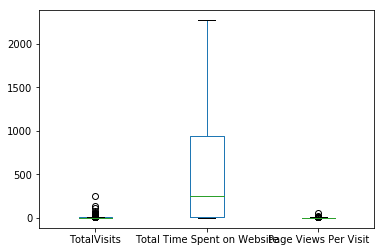

In [56]:
numcols[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].plot.box()

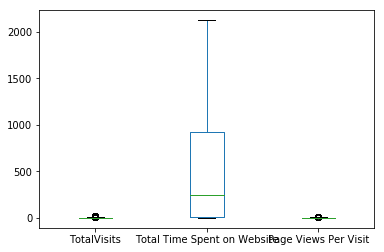

In [57]:
outlier[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].plot.box()

In [58]:
outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9037 entries, 0 to 9239
Columns: 139 entries, Lead Number to LQ__Worst
dtypes: float64(2), int64(6), uint8(131)
memory usage: 1.7 MB


In [59]:
XedLead=outlier

In [60]:
#data loss
1-(XedLead.shape[0]/XedLeadchk.shape[0])

0.021969696969696972

## Standardization

In [61]:
numcols=XedLead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9037 entries, 0 to 9239
Data columns (total 3 columns):
TotalVisits                    9037 non-null float64
Total Time Spent on Website    9037 non-null int64
Page Views Per Visit           9037 non-null float64
dtypes: float64(2), int64(1)
memory usage: 282.4 KB


In [62]:
# Normalising continuous features
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

norm_numcols=(numcols-numcols.mean())/numcols.std()
XedLead = XedLead.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'],axis= 1)
XedLead = pd.concat([XedLead,norm_numcols],axis=1)
norm_numcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9037 entries, 0 to 9239
Data columns (total 3 columns):
TotalVisits                    9037 non-null float64
Total Time Spent on Website    9037 non-null float64
Page Views Per Visit           9037 non-null float64
dtypes: float64(3)
memory usage: 282.4 KB


In [63]:
XedLead.info()
XedLead.head(13)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9037 entries, 0 to 9239
Columns: 139 entries, Lead Number to Page Views Per Visit
dtypes: float64(3), int64(5), uint8(131)
memory usage: 1.7 MB


,Lead Number,Do Not Email,Converted,Through Recommendations,A free copy of Mastering The Interview,LEAD__Direct Traffic,LEAD__Facebook,LEAD__Google,LEAD__Live Chat,LEAD__NC_EDM,...,TAG__switched off,TAG__wrong number given,LQ__Low in Relevance,LQ__Might be,LQ__Not Sure,LQ__Unknown,LQ__Worst,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,-1.062888,-0.883746,-1.192124
1,660728,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.670299,0.352719,0.163464
2,660727,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,-0.369614,1.926737,-0.107654
3,660719,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,-0.716251,-0.324218,-0.649889
4,660681,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,-0.369614,1.735947,-0.649889
5,660680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-1.062888,-0.883746,-1.192124
6,660673,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,-0.369614,2.124865,-0.107654
7,660664,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-1.062888,-0.883746,-1.192124
8,660624,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,-0.369614,-0.753495,-0.107654
9,660616,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0.323661,-0.777344,0.976817


# Pre Analysis

In [64]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [65]:
hopkins(XedLead)

0.66496120687375138

### This value is close to the 0.7 benchamark and hence good for clustering

# TEST - TRAIN split

In [66]:
#X -> Feature variable
#Y -> Predicted output
x = XedLead.drop(['Lead Number','Converted'],axis=1)
y = XedLead['Converted']

In [67]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,test_size=0.3,random_state=100)

# RFE analysis

In [385]:
print(x_train.shape)

(6325, 137)


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, 15) 
rfe = rfe.fit(x_train, y_train)
#list(zip(x_train.columns, rfe.support_, rfe.ranking_))

In [69]:
col=x_train.columns[rfe.support_]

### Evaluation of RFE variables

In [72]:
x_train_subset=x_train[col]
x_test_subset=x_test[col]

In [73]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(x_train_subset)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6325
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.0
Date:                Sun, 03 Mar 2019   Deviance:                       2544.0
Time:                        09:44:19   Pearson chi2:                 1.15e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1488      0.200    -15.782      0.000      -3.540      -2.758
Do Not Email                                -1.3737      0.218     -6.289      0.000      -1.802      -0.946
LEAD__Welingak Website                       2.3878      0.732      3.264      0.001       0.954       3.822
LAST__Converted to Lead                     -1.5799      0.360     -4.390      0.000      -2.285      -0.874
LAST__Olark Chat Conversation               -1.6126      0.236     -6.829      0.000      -2.075      -1.150
LAST__SMS Sent                               1.8186      0.116     15.613      0.000       1.590       2.047
OCC__Unknown                                -2.7607      0.142    -19.431      0.000      -3.039      -2.482
TAG__Busy                                    2.5583      0.277      9.223      0.000       2.015       3.102
TAG__Closed by Horizzon                      7.9781      0.739     10.797      0.000       6.530       9.426
TAG__Lost to EINS                            9.4014      0.782     12.029      0.000       7.870      10.933
TAG__Ringing                                -1.3276      0.291     -4.565      0.000      -1.898      -0.758
TAG__Unknown                                 3.6303      0.226     16.094      0.000       3.188       4.072
TAG__Will revert after reading the email     6.4655      0.262     24.651      0.000       5.951       6.980
TAG__invalid number                        -21.8627   1.62e+04     -0.001      0.999   -3.17e+04    3.17e+04
TAG__switched off                           -1.7560      0.620     -2.833      0.005      -2.971      -0.541
LQ__Worst                                   -2.6914      0.855     -3.147      0.002      -4.368      -1.015
============================================================================================================
"""

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train_subset.columns
vif['VIF'] = [variance_inflation_factor(x_train_subset.values, i) for i in range(x_train_subset.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,TAG__Unknown,5.08
5,OCC__Unknown,4.65
4,LAST__SMS Sent,1.68
11,TAG__Will revert after reading the email,1.35
3,LAST__Olark Chat Conversation,1.21
1,LEAD__Welingak Website,1.13
0,Do Not Email,1.11
9,TAG__Ringing,1.11
14,LQ__Worst,1.08
2,LAST__Converted to Lead,1.06


In [75]:
#dropping variables with high collinearity
cols=list(col)
cols.remove('TAG__invalid number')

### Evaluation of RFE variables

In [112]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train_subset=x_train[cols]
x_test_subset=x_test[cols]
learner_LGM = LogisticRegression()
model_LGM = learner_LGM.fit(x_train_subset,y_train)
pred_probs_train=model_LGM.predict_proba(x_train_subset)[:,1]
"{:2.3}".format(metrics.roc_auc_score(y_train, pred_probs_train))

'0.969'

In [77]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(x_train_subset)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6325
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.7
Date:                Sun, 03 Mar 2019   Deviance:                       2551.5
Time:                        09:44:44   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2685      0.200    -16.356      0.000      -3.660      -2.877
Do Not Email                                -1.3708      0.218     -6.281      0.000      -1.799      -0.943
LEAD__Welingak Website                       2.3899      0.731      3.267      0.001       0.956       3.824
LAST__Converted to Lead                     -1.5778      0.360     -4.377      0.000      -2.284      -0.871
LAST__Olark Chat Conversation               -1.6119      0.236     -6.822      0.000      -2.075      -1.149
LAST__SMS Sent                               1.8037      0.116     15.534      0.000       1.576       2.031
OCC__Unknown                                -2.7558      0.142    -19.432      0.000      -3.034      -2.478
TAG__Busy                                    2.6858      0.276      9.715      0.000       2.144       3.228
TAG__Closed by Horizzon                      8.0975      0.739     10.957      0.000       6.649       9.546
TAG__Lost to EINS                            9.5115      0.782     12.169      0.000       7.980      11.043
TAG__Ringing                                -1.1968      0.290     -4.131      0.000      -1.765      -0.629
TAG__Unknown                                 3.7523      0.225     16.643      0.000       3.310       4.194
TAG__Will revert after reading the email     6.5865      0.262     25.114      0.000       6.072       7.100
TAG__switched off                           -1.6248      0.619     -2.624      0.009      -2.838      -0.411
LQ__Worst                                   -2.6529      0.861     -3.082      0.002      -4.340      -0.966
============================================================================================================
"""

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train_subset.columns
vif['VIF'] = [variance_inflation_factor(x_train_subset.values, i) for i in range(x_train_subset.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,TAG__Unknown,5.07
5,OCC__Unknown,4.65
4,LAST__SMS Sent,1.67
11,TAG__Will revert after reading the email,1.35
3,LAST__Olark Chat Conversation,1.21
1,LEAD__Welingak Website,1.13
0,Do Not Email,1.11
9,TAG__Ringing,1.11
13,LQ__Worst,1.08
2,LAST__Converted to Lead,1.06


# PCA Analysis

In [79]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [80]:
#cumulative sum of variance 
np.cumsum(pca.explained_variance_ratio_)

array([ 0.30709573,  0.41756504,  0.50493793,  0.55991287,  0.60495795,
        0.64546041,  0.68231226,  0.7118596 ,  0.73303327,  0.75029456,
        0.76648495,  0.78211001,  0.7957422 ,  0.80872444,  0.8213443 ,
        0.83293271,  0.84400135,  0.85436673,  0.86369877,  0.87244736,
        0.88057271,  0.88833288,  0.89564616,  0.90186224,  0.90796714,
        0.91370873,  0.91909534,  0.92423887,  0.92895289,  0.93361341,
        0.93769338,  0.94142092,  0.94484603,  0.94803575,  0.95097127,
        0.95381671,  0.95651343,  0.95898017,  0.9613669 ,  0.96370495,
        0.96599233,  0.96813085,  0.97007036,  0.97192508,  0.97370703,
        0.97540393,  0.97704969,  0.97860713,  0.98011715,  0.98153031,
        0.98287087,  0.98412552,  0.98532389,  0.9864653 ,  0.98752166,
        0.98843628,  0.98928806,  0.99011891,  0.99091796,  0.99168301,
        0.99235893,  0.99302316,  0.99361916,  0.99417624,  0.99466433,
        0.99513515,  0.99551769,  0.99589738,  0.99621151,  0.99

#### 34 Principal Components together constitute 94.8 % variance

In [81]:
#PCA final
pca_final=PCA(n_components=34)
pca_final.fit(x_train)
Xed_pca_train=pca_final.fit_transform(x_train)
Xed_pca_train.shape

(6325, 34)

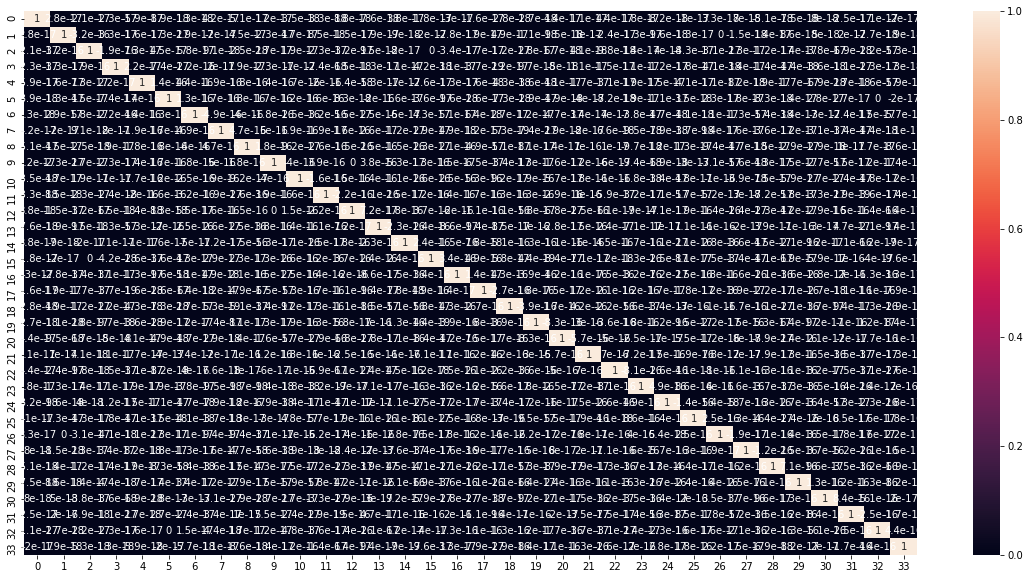

In [82]:
corrmat = np.corrcoef(Xed_pca_train.transpose())
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

#### multi collinearity doesn't exist

# Logistic Model Building

In [83]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(Xed_pca_train,y_train)

In [84]:
#Applying the model on train dataset
Xed_test_pca=pca_final.transform(x_test)
pred_probs_test = model_pca.predict_proba(Xed_test_pca)[:,1]

In [85]:
#AUC score
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.96'

## PCA experiment with lower number of components

In [86]:
#PCA final
pca_final=PCA(n_components=9)
pca_final.fit(x_train)
Xed_pca_train=pca_final.fit_transform(x_train)
Xed_pca_train.shape

(6325, 9)

# Logistic Model Building

In [87]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(Xed_pca_train,y_train)

In [88]:
#Applying the model on train dataset
Xed_test_pca=pca_final.transform(x_test)
print(Xed_test_pca.shape)
pred_probs_test = model_pca.predict_proba(Xed_test_pca)[:,1]

(2712, 9)


In [89]:
#AUC score
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.92'

### Principal Component Analysis

In [90]:
colnames=x_train.columns
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca_final.components_[0],'PC2':pca_final.components_[1],'PC3':pca_final.components_[2],
                       'PC4':pca_final.components_[3],'PC5':pca_final.components_[4],
                       'PC6':pca_final.components_[5],'PC7':pca_final.components_[6],
                       'PC8':pca_final.components_[7],'PC9':pca_final.components_[8]})
#print(pcs_df)


In [91]:
PC1=pcs_df[['Feature','PC1']].sort_values(by=['PC1'],ascending=False)
PC2=pcs_df[['Feature','PC2']].sort_values(by=['PC2'],ascending=False)
PC3=pcs_df[['Feature','PC3']].sort_values(by=['PC3'],ascending=False)
PC4=pcs_df[['Feature','PC4']].sort_values(by=['PC4'],ascending=False)
PC5=pcs_df[['Feature','PC5']].sort_values(by=['PC5'],ascending=False)
PC6=pcs_df[['Feature','PC6']].sort_values(by=['PC6'],ascending=False)
PC7=pcs_df[['Feature','PC7']].sort_values(by=['PC7'],ascending=False)
PC8=pcs_df[['Feature','PC8']].sort_values(by=['PC8'],ascending=False)
PC9=pcs_df[['Feature','PC9']].sort_values(by=['PC9'],ascending=False)
PC1.set_index(['Feature'],inplace=True)
PC2.set_index(['Feature'],inplace=True)
PC3.set_index(['Feature'],inplace=True)
PC4.set_index(['Feature'],inplace=True)
PC5.set_index(['Feature'],inplace=True)
PC6.set_index(['Feature'],inplace=True)
PC7.set_index(['Feature'],inplace=True)
PC8.set_index(['Feature'],inplace=True)
PC9.set_index(['Feature'],inplace=True)

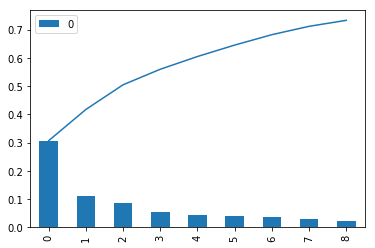

In [92]:
PCAF_EVR=pd.DataFrame(pca_final.explained_variance_ratio_)
PCAF_EVR.plot.bar()
plt.plot(np.cumsum(pca_final.explained_variance_ratio_))

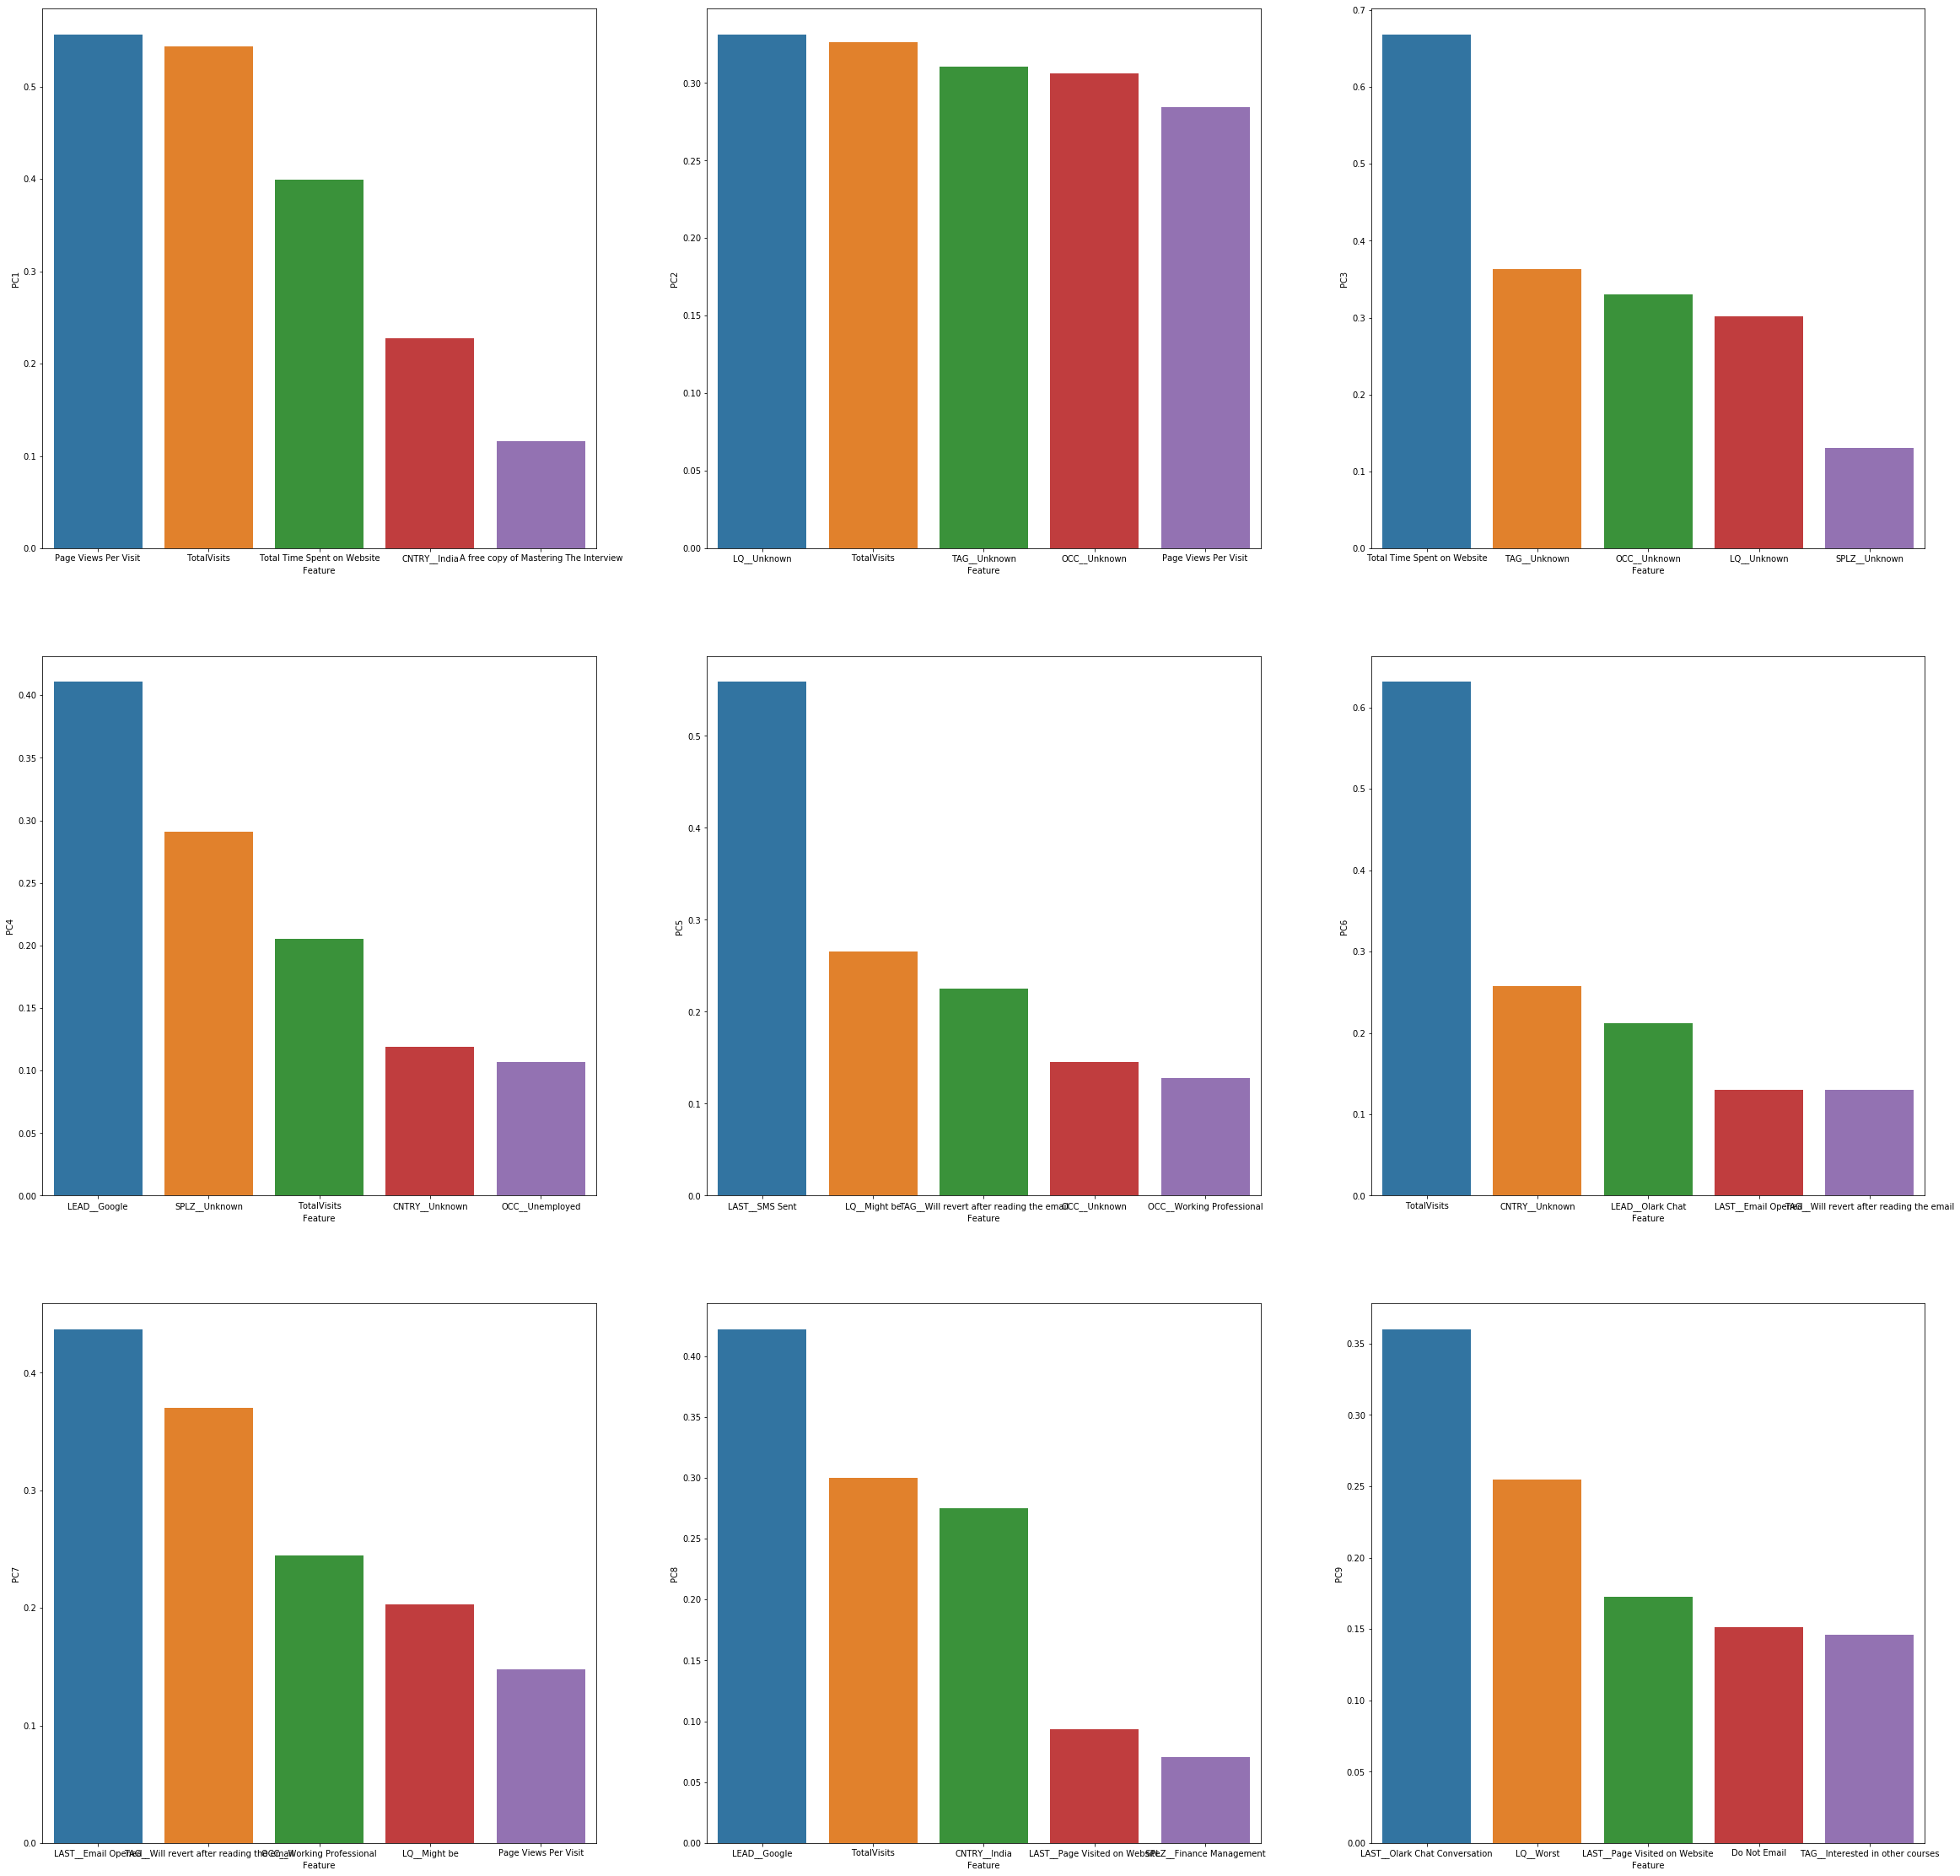

In [93]:
plt.figure(figsize = (40,40))

plt.subplot(3,3,1)
sns.barplot(x=PC1.head().index,y=PC1.head().PC1)

plt.subplot(3,3,2)
sns.barplot(x=PC2.head().index,y=PC2.head().PC2)

plt.subplot(3,3,3)
sns.barplot(x=PC3.head().index,y=PC3.head().PC3)

plt.subplot(3,3,4)
sns.barplot(x=PC4.head().index,y=PC4.head().PC4)

plt.subplot(3,3,5)
sns.barplot(x=PC5.head().index,y=PC5.head().PC5)

plt.subplot(3,3,6)
sns.barplot(x=PC6.head().index,y=PC6.head().PC6)

plt.subplot(3,3,7)
sns.barplot(x=PC7.head().index,y=PC7.head().PC7)

plt.subplot(3,3,8)
sns.barplot(x=PC8.head().index,y=PC8.head().PC8)

plt.subplot(3,3,9)
sns.barplot(x=PC9.head().index,y=PC9.head().PC9)

plt.show()




# Model Building and final score

### The PCA approach provides a model that gives better AUC. We are hence chosing this model as final

In [94]:
y_pred=pd.DataFrame(pred_probs_test)
y_pred.columns=['Score']
y_pred['Score']=y_pred['Score'].apply(lambda x:round(x*100),0)

In [95]:
y_test_pd=pd.DataFrame(y_test)

In [96]:
y_pred.reset_index(drop=True, inplace=True)
y_test_pd.reset_index(drop=True, inplace=True)

In [97]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_pred, y_test_pd],axis=1)
y_pred_final.head()

,Score,Converted
0,89,1
1,7,0
2,46,0
3,17,0
4,22,0


In [98]:
y_pred_final['Predicted_Conv']=y_pred_final.Score.map(lambda x:1 if x>50 else 0)
y_pred_final.head(10)

,Score,Converted,Predicted_Conv
0,89,1,1
1,7,0,0
2,46,0,0
3,17,0,0
4,22,0,0
5,2,0,0
6,7,0,0
7,100,1,1
8,27,0,0
9,70,0,1


## Optimal Cutoff Analysis

In [99]:
numbers = np.around(np.linspace(0, 100, 100),decimals=0)
for i in numbers:
    y_pred_final[i]= y_pred_final.Score.map(lambda x: 1 if x > i else 0)
y_pred_final.head(10)

,Score,Converted,Predicted_Conv,0.0,1.0,2.0,3.0,4.0,5.0,6.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
0,89,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,46,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,17,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,22,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,100,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
8,27,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,70,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [101]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = np.around(np.linspace(0, 100, 100),decimals=0)
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

In [102]:
cutoff_df.sort_values(by=['accuracy'],ascending=False,inplace=True)
print(cutoff_df.head(20))

      prob  accuracy  sensitivity  specificity
46.0  46.0  0.860619     0.806545     0.894202
45.0  45.0  0.858038     0.811357     0.887029
44.0  44.0  0.856563     0.813282     0.883443
43.0  43.0  0.853982     0.816169     0.877466
41.0  41.0  0.853982     0.823869     0.872684
42.0  42.0  0.853614     0.820019     0.874477
47.0  47.0  0.853245     0.784408     0.895995
40.0  40.0  0.852507     0.823869     0.870293
51.0  51.0  0.852507     0.744947     0.919307
52.0  52.0  0.851770     0.739172     0.921698
39.0  39.0  0.849926     0.827719     0.863718
53.0  53.0  0.849926     0.731473     0.923491
49.0  49.0  0.849926     0.755534     0.908548
38.0  38.0  0.849558     0.830606     0.861327
55.0  55.0  0.849189     0.721848     0.928273
48.0  48.0  0.849189     0.758422     0.905559
54.0  54.0  0.848820     0.726660     0.924686
37.0  37.0  0.847714     0.833494     0.856545
33.0  33.0  0.846976     0.850818     0.844591
36.0  36.0  0.846976     0.834456     0.854752


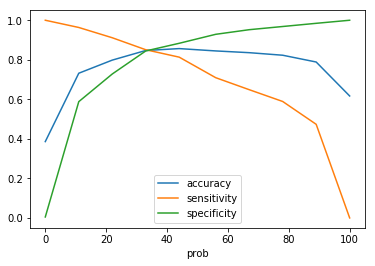

In [107]:
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = np.around(np.linspace(0, 100, 10),decimals=0)
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df1.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

## Score value = 37 is the optimum threshold

In [108]:
final_pred=y_pred_final[['Score','Converted']]
final_pred['Predicted_Conv']=final_pred.Score.map(lambda x:1 if x>46 else 0)
final_pred.head(10)

,Score,Converted,Predicted_Conv
0,89,1,1
1,7,0,0
2,46,0,0
3,17,0,0
4,22,0,0
5,2,0,0
6,7,0,0
7,100,1,1
8,27,0,0
9,70,0,1


In [110]:
cutoff_df.sort_values(by=['sensitivity'],ascending=False,inplace=True)
print(cutoff_df.head(30))
#reduce the threshold score to 13. It gives 75% accuracy but 95% sensitivity

      prob  accuracy  sensitivity  specificity
0.0    0.0  0.386062     1.000000     0.004782
1.0    1.0  0.422566     0.999038     0.064555
2.0    2.0  0.467183     0.996150     0.138673
3.0    3.0  0.501106     0.995188     0.194262
4.0    4.0  0.538717     0.992300     0.257023
5.0    5.0  0.570796     0.990375     0.310221
6.0    6.0  0.594027     0.983638     0.352062
7.0    7.0  0.662242     0.976901     0.466826
8.0    8.0  0.684366     0.974976     0.503885
9.0    9.0  0.705383     0.972089     0.539749
10.0  10.0  0.720133     0.965351     0.567842
11.0  11.0  0.731932     0.963426     0.588165
12.0  12.0  0.738201     0.957652     0.601913
13.0  13.0  0.750737     0.950914     0.626420
14.0  14.0  0.760693     0.947064     0.644949
15.0  15.0  0.769174     0.945140     0.659892
16.0  16.0  0.774336     0.938402     0.672445
17.0  17.0  0.778761     0.934552     0.682008
18.0  18.0  0.782817     0.927815     0.692767
19.0  19.0  0.785398     0.923965     0.699342
20.0  20.0  0

In [111]:
cutoff_df.sort_values(by=['specificity'],ascending=False,inplace=True)
print(cutoff_df.head(50))
#increase score to 66. gives 95% specificity with 84% accuracy

        prob  accuracy  sensitivity  specificity
100.0  100.0  0.616888     0.000000     1.000000
99.0    99.0  0.653024     0.095284     0.999402
98.0    98.0  0.690265     0.193455     0.998805
97.0    97.0  0.713127     0.256015     0.997011
96.0    96.0  0.732301     0.308951     0.995218
95.0    95.0  0.743732     0.341675     0.993425
94.0    94.0  0.754794     0.375361     0.990436
93.0    93.0  0.764012     0.401347     0.989241
92.0    92.0  0.771755     0.424447     0.987448
91.0    91.0  0.775442     0.435034     0.986850
90.0    90.0  0.783555     0.457170     0.986252
89.0    89.0  0.788717     0.473532     0.984459
88.0    88.0  0.794985     0.493744     0.982068
87.0    87.0  0.800147     0.510106     0.980275
86.0    86.0  0.803466     0.523580     0.977286
85.0    85.0  0.807153     0.536092     0.975493
84.0    84.0  0.811209     0.549567     0.973700
83.0    83.0  0.814528     0.558229     0.973700
82.0    82.0  0.816372     0.563041     0.973700
81.0    81.0  0.8174

# Final Deliverable
## PCA instance: pca_final
## Model instance: model_pca